# Tarea Nro. 2 - PANDAS

- Nombre y Apellido: Renato Balcázar
- Fecha:             2020-11-17

En esta tarea se examinara datos de terremotos. Comience importando pandas, numpy y matplolib.

Los datos de los terremotos están localizados en usgs_terremotos_2014.csv. Ni siquiera necesita descargalo, puede abrilo directamente con Pandas.

A continuación resuelva los siguientes items. 

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import us
import country_list

### 1) Use la función read_csv de Pandas directamente en esta url para abrirla como un DataFrame

(No use ninguna opción especial). Mostrar las primeras filas y la información del marco de datos.
Debería haber visto que las fechas no se analizaron automáticamente en tipos de fecha y hora.

In [69]:
data = pd.read_csv('usgs_terremotos_2014.csv')
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


### 2) Vuelva a leer los datos de tal manera que todas las columnas de fechas se identifiquen como fechas y la identificación del terremoto se use como índice

In [70]:
data = pd.read_csv('usgs_terremotos_2014.csv', parse_dates=['time'], infer_datetime_format=['updated'])
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


### 3) Obtener las estadísticas básicas de todas las columnas

In [71]:
data.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,120108.000000,120108.000000,120107.000000,120065.000000,59688.000000,94935.000000,85682.000000,119716.000000
mean,38.399579,-99.961402,28.375029,1.793958,17.878284,124.048978,0.893198,0.358174
std,21.938258,82.996858,62.215416,1.343466,14.911369,68.518595,2.903966,0.364046
min,-73.462000,-179.998900,-9.900000,-0.970000,0.000000,9.000000,0.000000,0.000000
25%,34.228917,-147.742025,4.100000,0.820000,8.000000,74.000000,0.020760,0.070000
50%,38.805300,-120.832000,9.200000,1.400000,14.000000,107.000000,0.073670,0.200000
75%,53.889500,-116.068100,22.880000,2.400000,22.000000,155.000000,0.447000,0.590000
max,86.651400,179.998000,697.360000,8.200000,365.000000,356.400000,64.498000,8.460000


### 4) Obtener los 20 terremotos más importantes por magnitud

Examina la estructura de la columna `place`. La información del país parece estar allí. ¿Cómo lo sacarías?

In [72]:
most_mag = pd.read_csv('usgs_terremotos_2014.csv', index_col=['mag'], usecols=['place', 'mag'], keep_default_na=False)
most_mag.sort_values(by=['mag'], ascending=False, inplace=True)
most_mag.head(20)

,place
mag,
8.2,"94km NW of Iquique, Chile"
7.9,"19km SE of Little Sitkin Island, Alaska"
7.7,"53km SW of Iquique, Chile"
7.6,"93km SSE of Kirakira, Solomon Islands"
7.5,"70km SW of Panguna, Papua New Guinea"
7.4,"112km S of Kirakira, Solomon Islands"
7.3,"74km S of Intipuca, El Salvador"
7.2,"33km ESE of Petatlan, Mexico"
7.1,"144km NE of Ndoi Island, Fiji"


### 5) Extraiga el país utilizando las funciones de datos de texto de Pandas 

Agréguelo como una nueva columna al dataframe. (¿Es realmente solo un país? No, algunas filas tienen el nombre de un estado de EE. UU.) Corrija esto https://www.geeksforgeeks.org/python-pandas-working-with-text-data/. 

Otra librería que puede ser útil https://pypi.org/project/us/ para identificar si es un estado de EEUU es `us`



In [73]:
import us

# Get only the names of staets in a list in python
us_states = []
for state in us.states.STATES:
    us_states.append(state.name)
    
# Separete the last part of place column and add into country column
data['country'] = data['place'].str.split(pat=",", n=1).str[1].str.lstrip()

# Replace the values that are in the given list of states with 'United States'
data.loc[data["country"].isin(us_states), "country"] = "United States"
data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,country
0,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,United States
1,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,United States
2,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake,United States
3,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake,United States
4,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120103,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,ak11453391,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake,United States
120104,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake,United States
120105,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake,United States
120106,2014-12-01 00:05:54.000,65.152100,-148.992000,9.50,0.40,ml,NaN,NaN,NaN,0.6900,ak,ak11453390,2014-12-10T01:03:01.225Z,"57km NW of Ester, Alaska",earthquake,United States


### 6) Encuentra los 10 países con el mayor número de terremotos

In [74]:
most_frecuently_countries = data['country'].value_counts().head(10)
most_frecuently_countries

 

United States       96684
Puerto Rico          2284
Indonesia            2120
Papua New Guinea     1356
Chile                1191
Japan                1150
Canada                765
New Zealand           762
Philippines           749
Mexico                677
Name: country, dtype: int64

### 7) Encuentra los 10 principales países donde ocurrieron los terremotos más fuertes y más débiles

In [94]:
data_by_countries = data.copy()
data_by_countries = data_by_countries[['mag', 'country']]


data_by_countries = data_by_countries[data_by_countries['country'] != '']
data_by_countries.dropna(inplace=True)

result_grouped = data_by_countries.groupby('country').max()

result_grouped.sort_values(by=['mag'], ascending=False, inplace=True)

# Más fuertes
result_grouped.head(10)

,mag
country,
Chile,8.2
United States,7.9
Solomon Islands,7.6
Papua New Guinea,7.5
El Salvador,7.3
Mexico,7.2
Indonesia,7.1
Fiji,7.1
Greece,6.9


In [79]:
# Más débiles
result_grouped.tail(10)

,mag,country
94538,-0.90,United States
99940,-0.90,United States
74269,-0.90,United States
63534,-0.90,United States
104468,-0.90,United States
99399,-0.90,United States
94228,-0.90,United States
94067,-0.90,United States
105565,-0.90,United States
116943,-0.97,United States


### 8) Cree un conjunto de datos filtrado que solo tenga terremotos de magnitud 4 o mayores 


In [101]:
df = pd.read_csv('usgs_terremotos_2014.csv', parse_dates=['time'], infer_datetime_format=['updated'])
df = df[df['mag'] >= 4]
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
10,2014-01-31 23:08:03.660,-4.9758,153.9466,110.18,4.2,mb,NaN,98.0,1.940,0.61,us,usc000mqlp,2014-04-08T01:43:19.000Z,"115km ESE of Taron, Papua New Guinea",earthquake
14,2014-01-31 22:54:32.970,-28.1775,-177.9058,95.84,4.3,mb,NaN,104.0,1.063,1.14,us,usc000mqln,2014-04-08T01:43:19.000Z,"120km N of Raoul Island, New Zealand",earthquake
16,2014-01-31 22:49:49.740,-23.1192,179.1174,528.34,4.4,mb,NaN,80.0,5.439,0.95,us,usc000mqls,2014-04-08T01:43:19.000Z,South of the Fiji Islands,earthquake
26,2014-01-31 22:19:44.330,51.1569,-178.0910,37.50,4.2,mb,NaN,NaN,NaN,0.83,us,usc000mf1x,2014-04-08T01:43:19.000Z,"72km E of Amatignak Island, Alaska",earthquake
31,2014-01-31 21:56:44.320,-4.8800,153.8434,112.66,4.3,mb,NaN,199.0,1.808,0.79,us,usc000mqlm,2014-04-08T01:43:19.000Z,"100km ESE of Taron, Papua New Guinea",earthquake


### 9) Analice la distribución de las magnitudes del terremoto en la distribución filtrada
Haga un histograma del conteo del terremoto versus la magnitud. Asegúrese de usar una escala logarítmica.


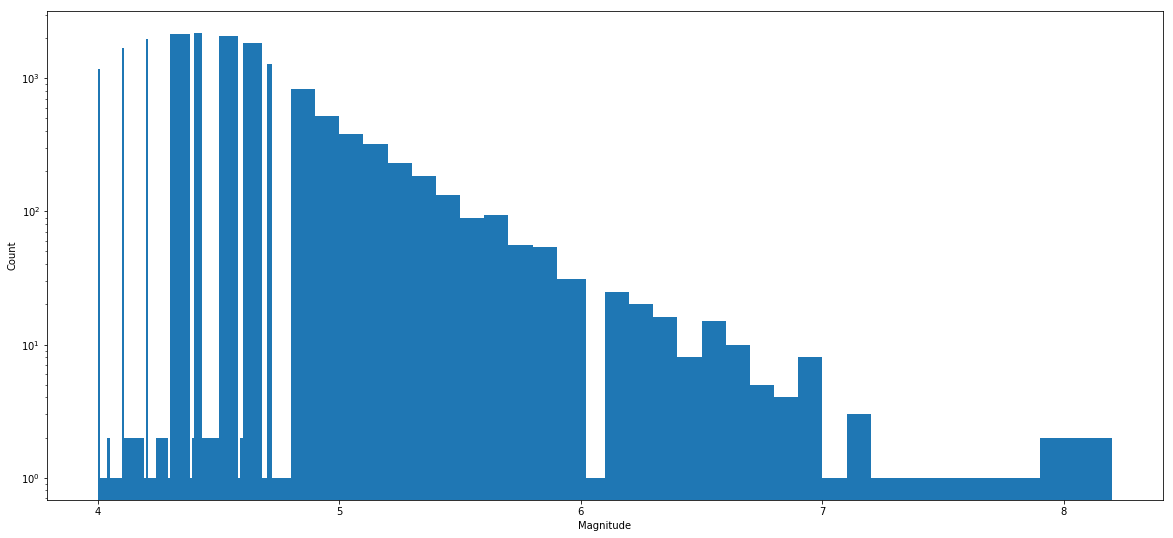

In [103]:
mag = df.mag.dropna()
plt.figure(figsize=(20,9))

plt.yscale('log')
plt.xlabel("Magnitude")
plt.ylabel("Count")
plt.hist(mag, bins=sorted(mag.unique()), alpha=1, edgecolor='black', linewidth=1)

plt.show()

### 10) Visualice la ubicación de los terremotos haciendo un diagrama de dispersión de su latitud y longitud.

#### Usa los datos filtrados. Coloréalo por magnitud.



Ej. plt.scatter(x, y, s=s, c=c, cmap=plt.cm.Oranges)

Con s y c podemos modificar el tamaño y el color respectivamente. Para el color, a cada valor numérico se le asigna un color a través de un mapa de colores; ese mapa se puede cambiar con el argumento cmap. Esa correspondencia se puede visualizar llamando a la función colorbar.

```

N = 100
x = np.random.randn(N)
y = np.random.randn(N)
s = 50 + 50 * np.random.randn(N)
c = np.random.randn(N)

plt.scatter(x, y, s=s, c=c, cmap=plt.cm.Blues)
plt.colorbar()

```
Ref. adicional para colores: https://github.com/lsantiago/PythonBasico/raw/d36d9571a1ff6a2df8364a9055f71d70eddd9151/NumpyMatplotlib/plot_colormaps.png


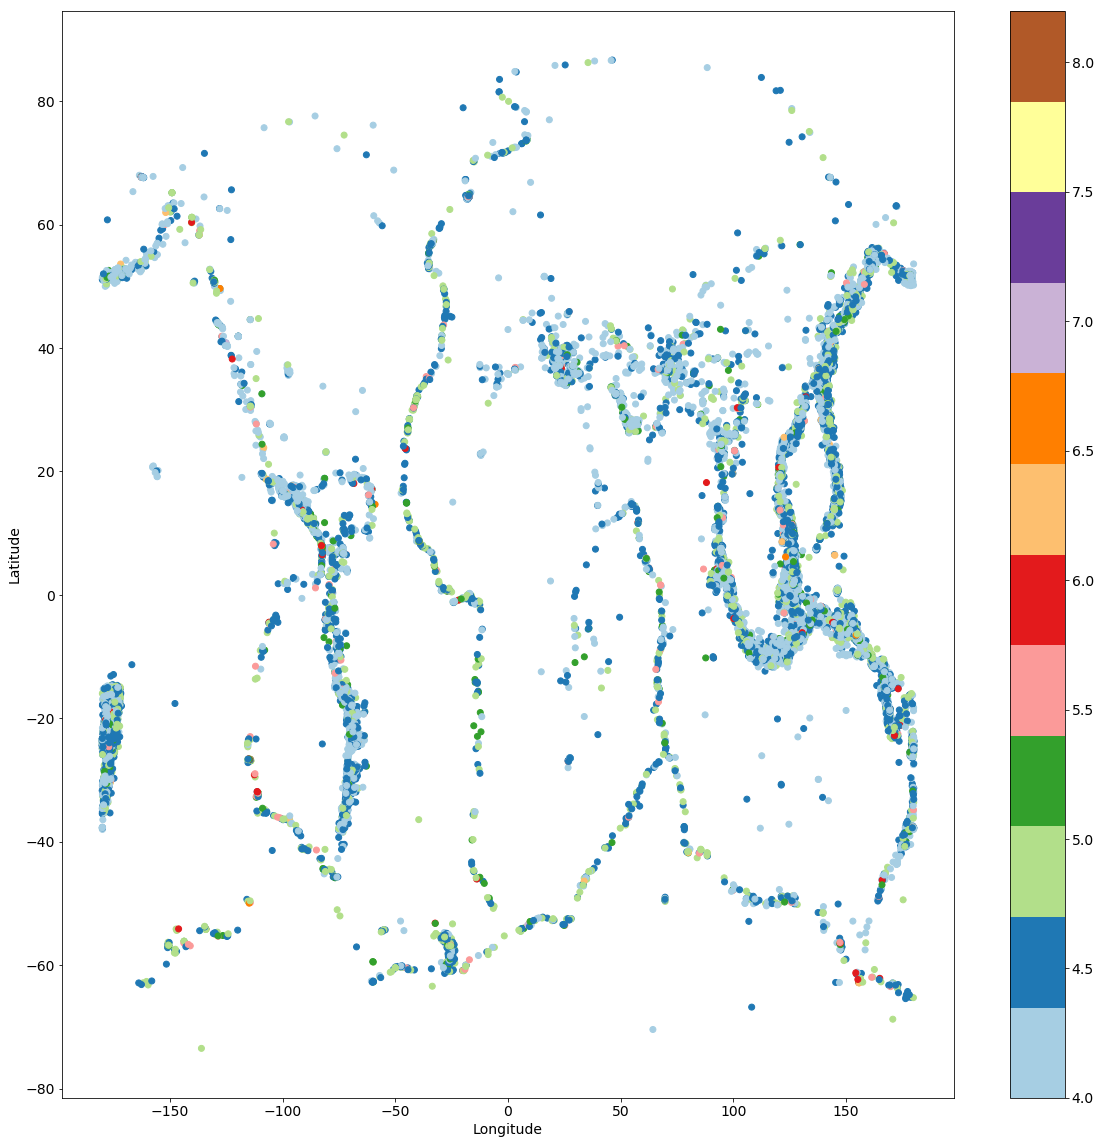

In [104]:
plt.figure(figsize=(20,20)) 
x = df.longitude 
y = df.latitude 
c = df.mag 
plt.rcParams["font.size"] = 14 
plt.scatter(x, y, c=c, cmap=plt.cm.Paired) 

plt.ylabel("Latitude")
plt.xlabel("Longitude")

plt.colorbar()

### 11) Haz lo mismo para la profundidad 

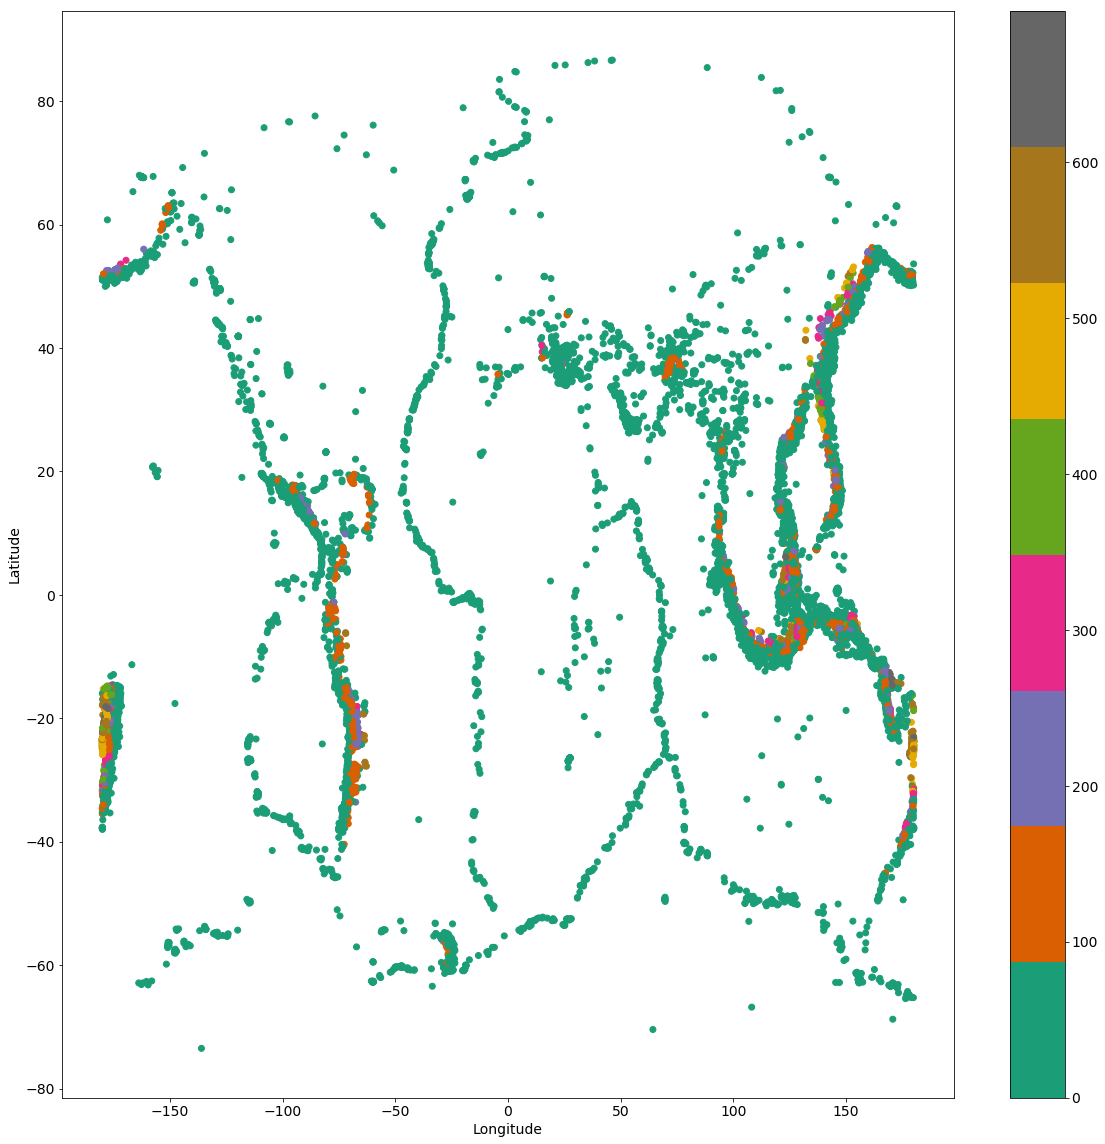

In [106]:
plt.figure(figsize=(20,20)) 

x = df.longitude 
y = df.latitude 
c = df.depth 
plt.rcParams["font.size"] = 14

plt.scatter(x, y, c=c, cmap=plt.cm.Dark2) 

plt.ylabel("Latitude")
plt.xlabel("Longitude")


plt.colorbar() 